<a href="https://colab.research.google.com/github/firarru/Matkul-ML/blob/main/ML_Social_Media_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
path = kagglehub.dataset_download("mahdimashayekhi/social-media-vs-productivity")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-media-vs-productivity


In [35]:
import os

files = os.listdir(path)
print("Files in dataset:", files)

dataset_path = os.path.join(path, "social_media_vs_productivity.csv")
df = pd.read_csv(dataset_path)

df

Files in dataset: ['social_media_vs_productivity.csv']


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,41.486867,13.835221,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,27235.0,3.113418,2.074813,0.000000,1.639566,3.025913,4.368917,17.973256
number_of_notifications,30000.0,59.958767,7.723772,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,30000.0,6.990792,1.997736,0.000000,5.643771,6.990641,8.354725,12.000000
perceived_productivity_score,28386.0,5.510488,2.023470,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,5.514059,2.866344,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,27402.0,6.500247,1.464004,3.000000,5.493536,6.498340,7.504143,10.000000
screen_time_before_sleep,27789.0,1.025568,0.653355,0.000000,0.528490,1.006159,1.477221,3.000000
breaks_during_work,30000.0,4.992200,3.173737,0.000000,2.000000,5.000000,8.000000,10.000000


# **Data Preparation**

In [38]:
df.drop_duplicates(inplace=True)

Handling Missing Value

In [39]:
df.isnull().sum()/len(df)*100

,0
age,0.000000
gender,0.000000
job_type,0.000000
daily_social_media_time,9.216667
social_platform_preference,0.000000
number_of_notifications,0.000000
work_hours_per_day,0.000000
perceived_productivity_score,5.380000
actual_productivity_score,7.883333
stress_level,6.346667


In [40]:
df.shape

(30000, 19)

In [41]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns

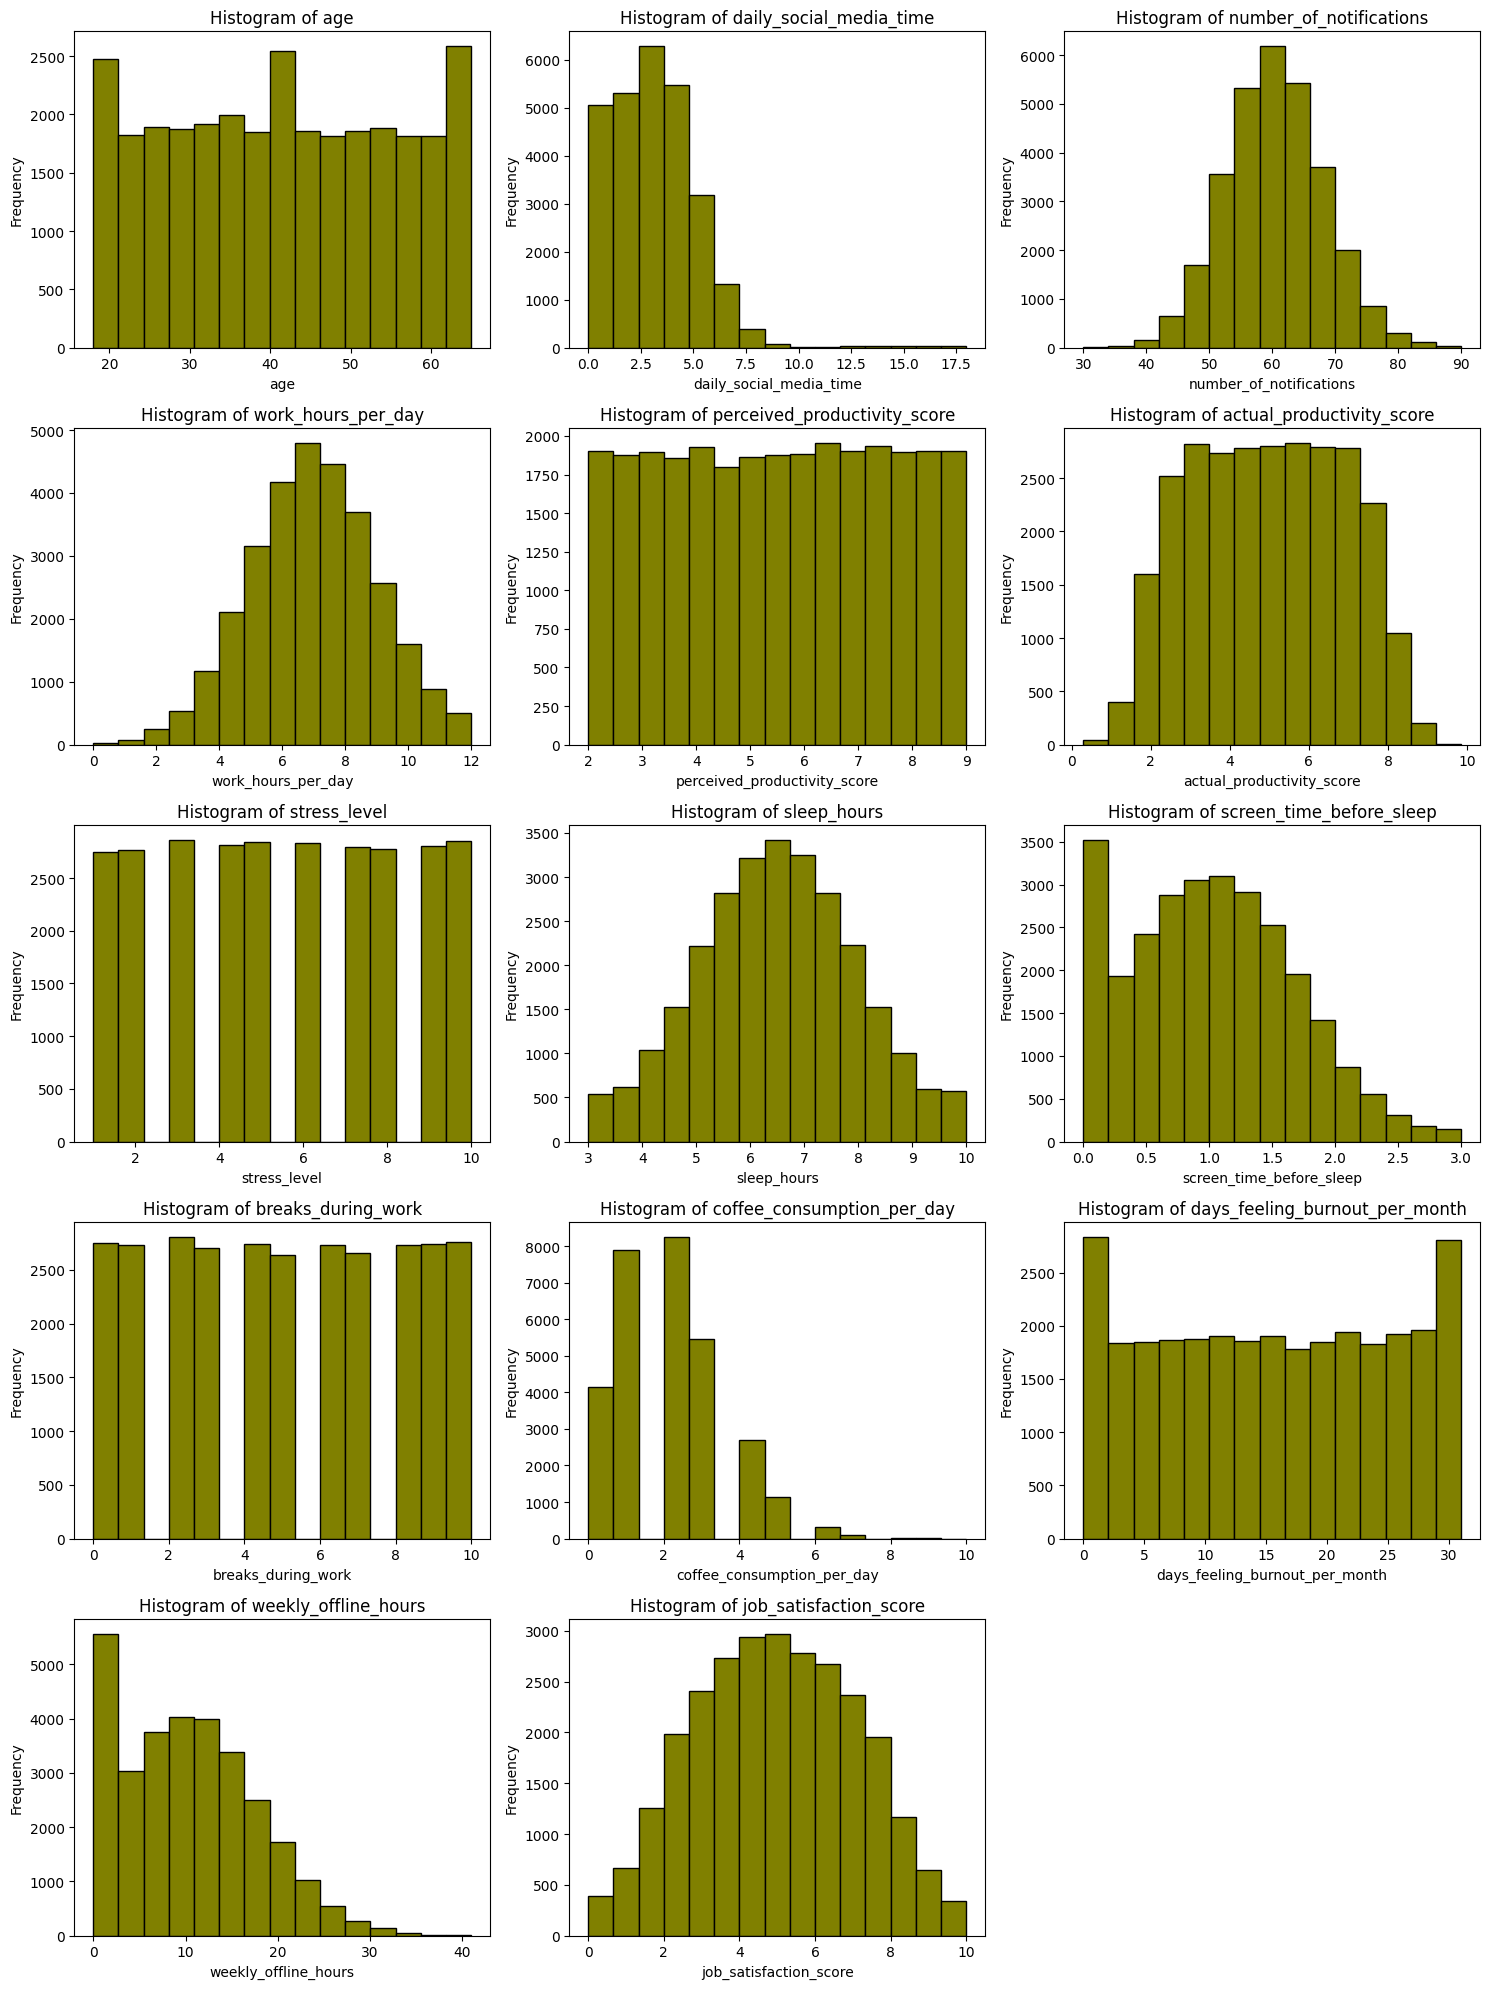

In [42]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(5, 3, i)
    df[col].plot(kind='hist', color='olive', bins=15, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Handling missing value dilakukan dengan mengisinya dengan mean atau median, tergantung dari distribusi data awal. Jika data berdistribusi normal maka missing value diisi dengan mean, jika tidak maka diisi dengan median

In [43]:
df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
df['perceived_productivity_score'].fillna(df['perceived_productivity_score'].mean(), inplace=True)
df['actual_productivity_score'].fillna(df['actual_productivity_score'].mean(), inplace=True)
df['stress_level'].fillna(df['stress_level'].mean(), inplace=True)
df['sleep_hours'].fillna(df['sleep_hours'].mean(), inplace=True)
df['screen_time_before_sleep'].fillna(df['screen_time_before_sleep'].median(), inplace=True)
df['job_satisfaction_score'].fillna(df['job_satisfaction_score'].mean(), inplace=True)

# **EDA**

Univariat

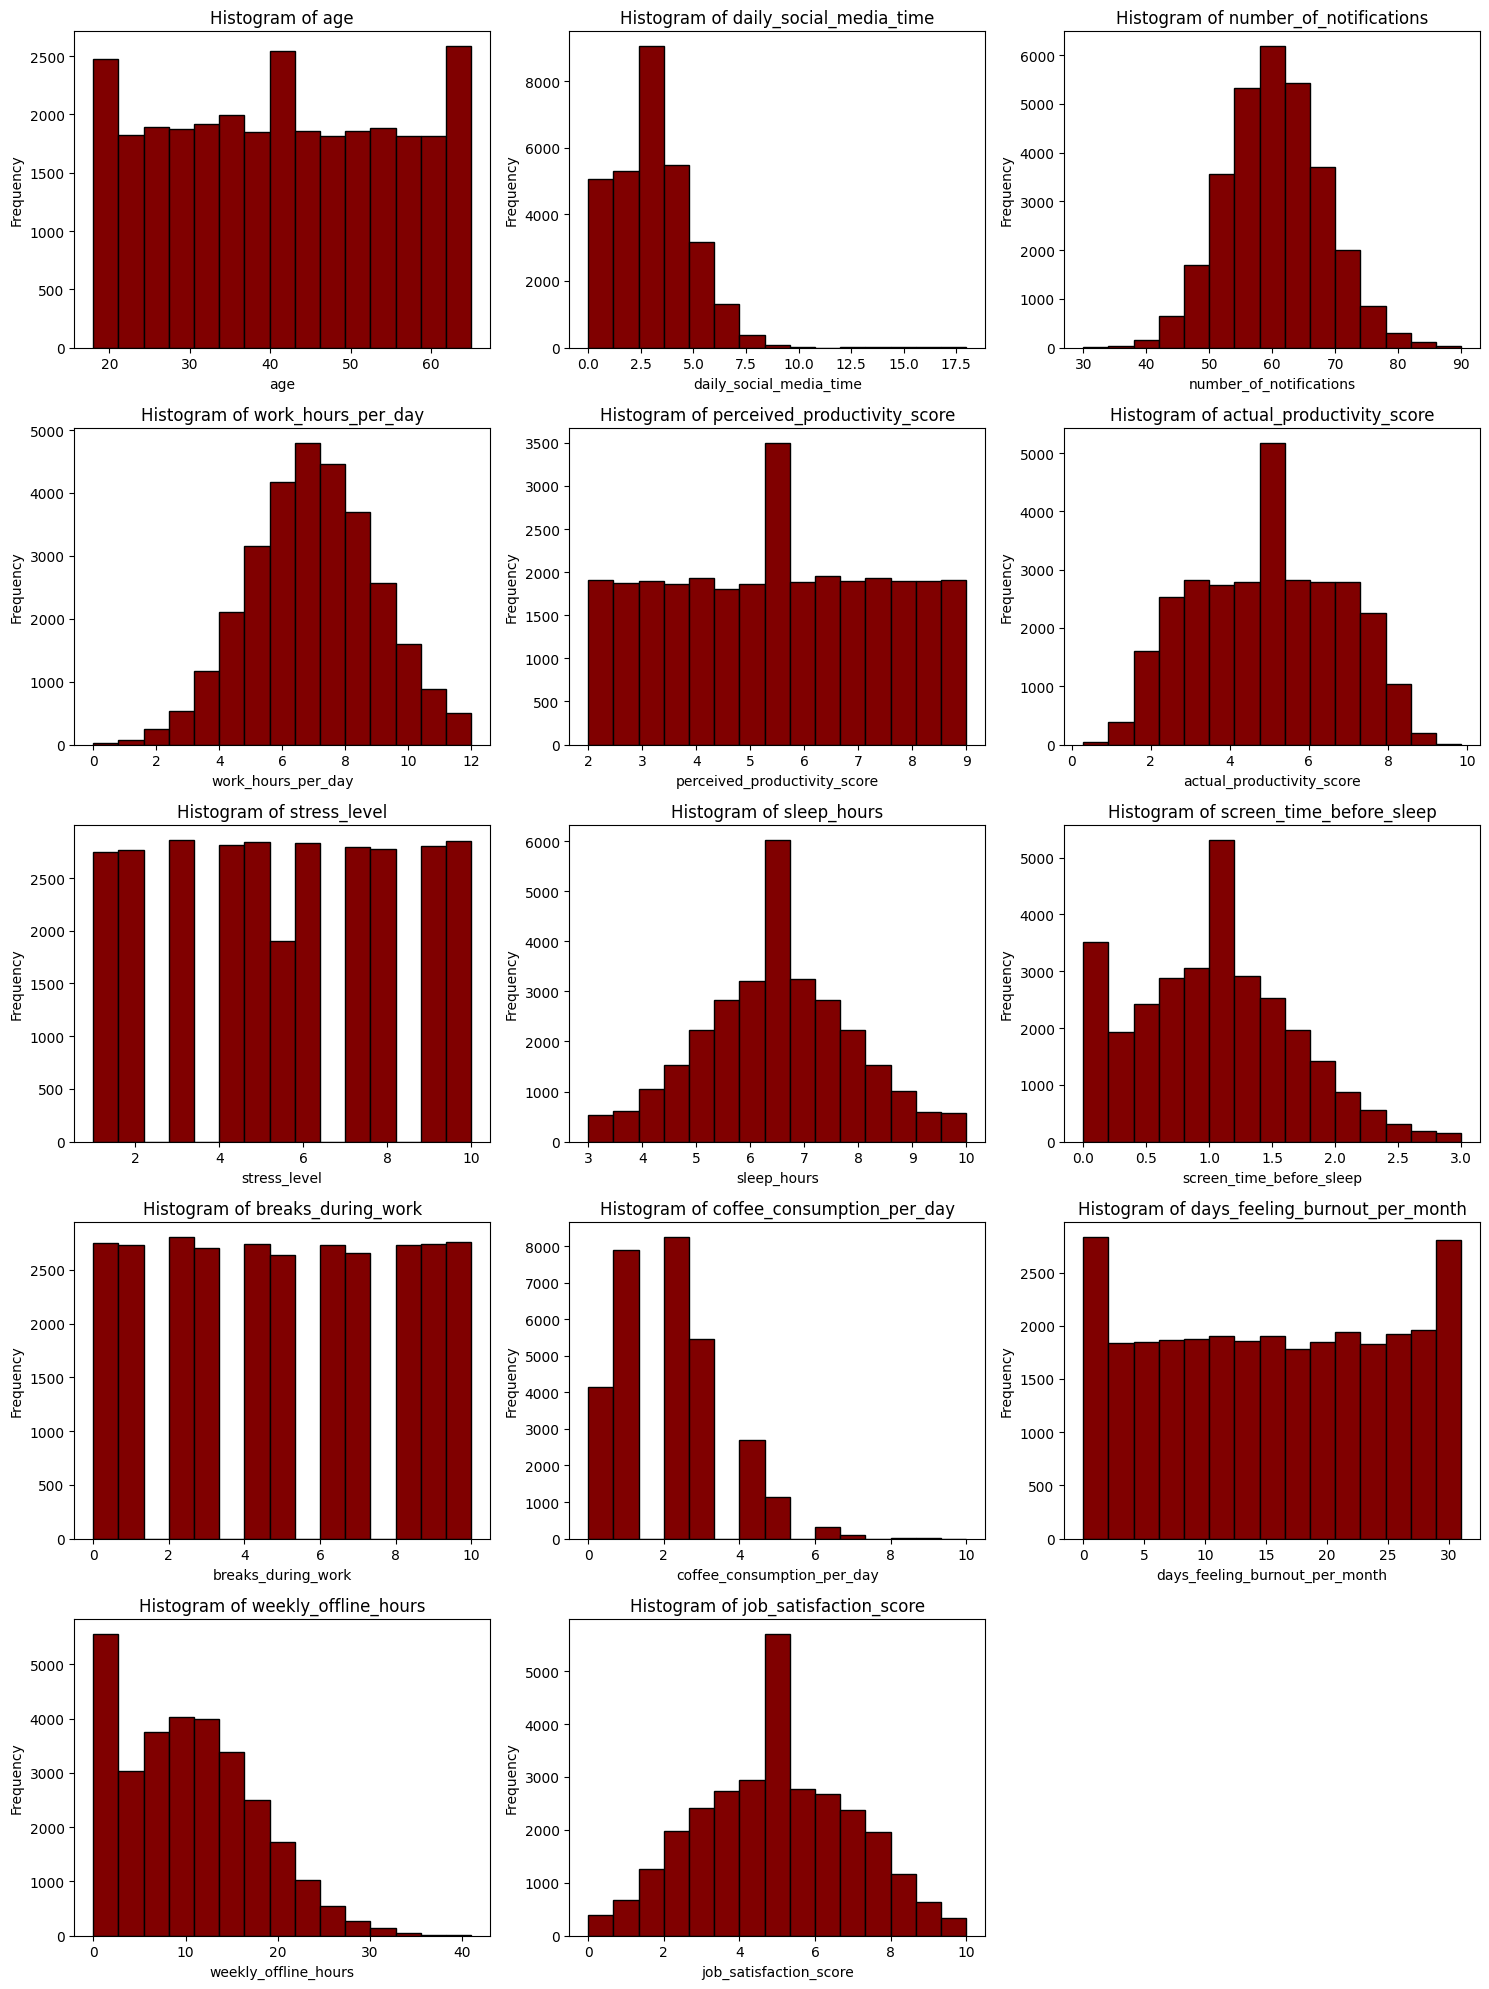

In [44]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(5, 3, i)
    df[col].plot(kind='hist', color='maroon', bins=15, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

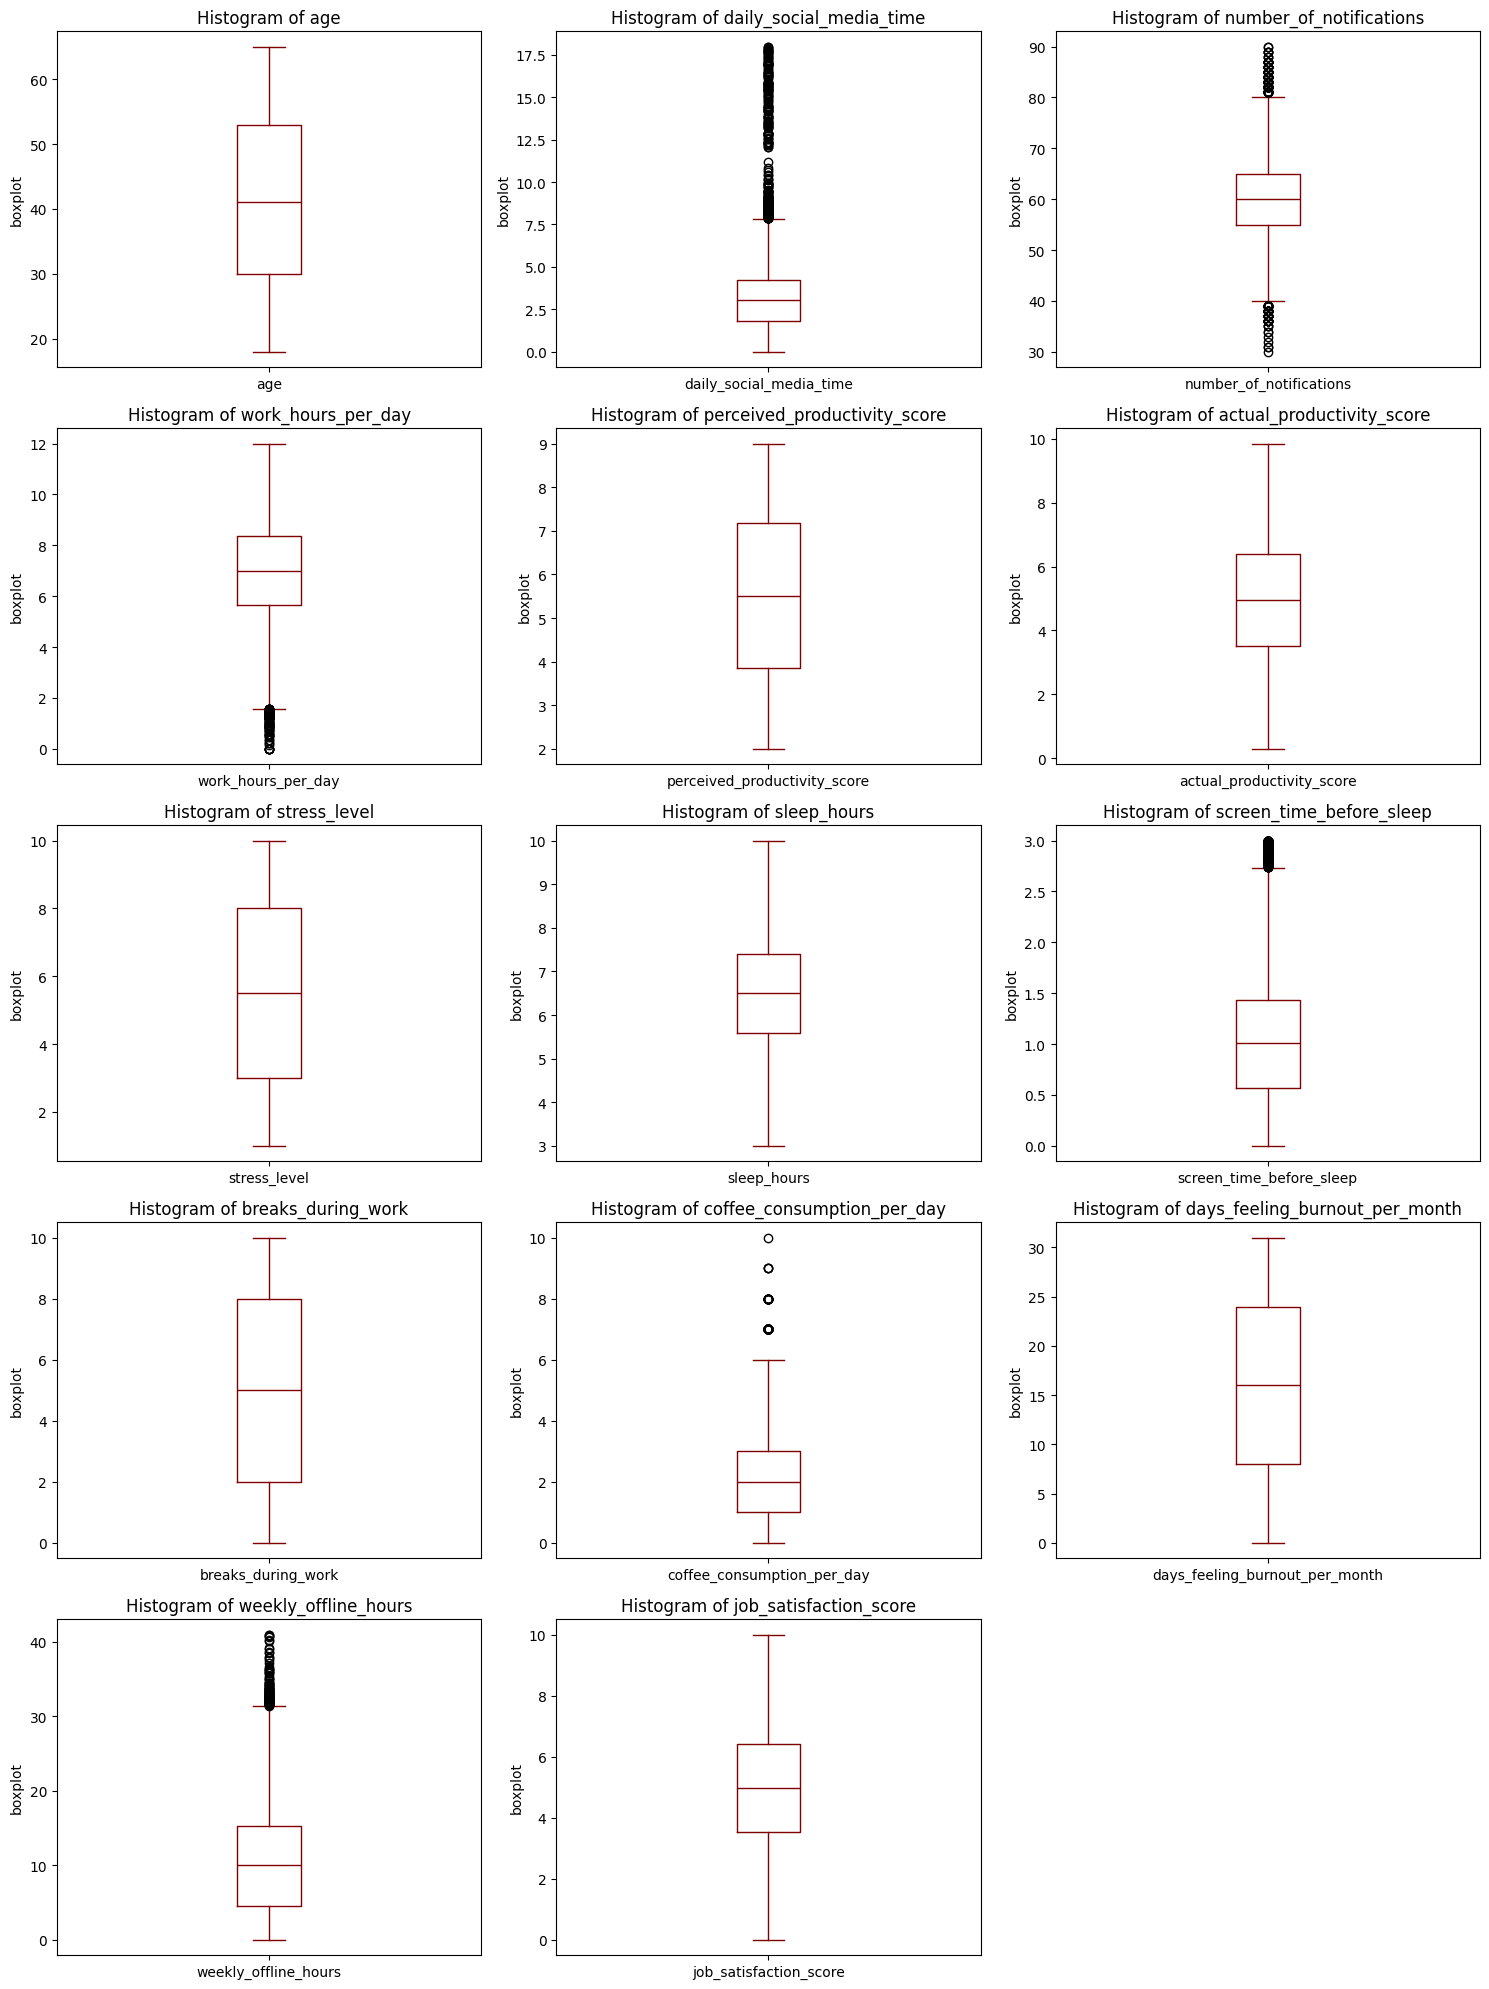

In [45]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(5, 3, i)
    df[col].plot(kind='box', color='maroon')
    plt.title(f'Histogram of {col}')
    plt.ylabel('boxplot')

plt.tight_layout()
plt.show()

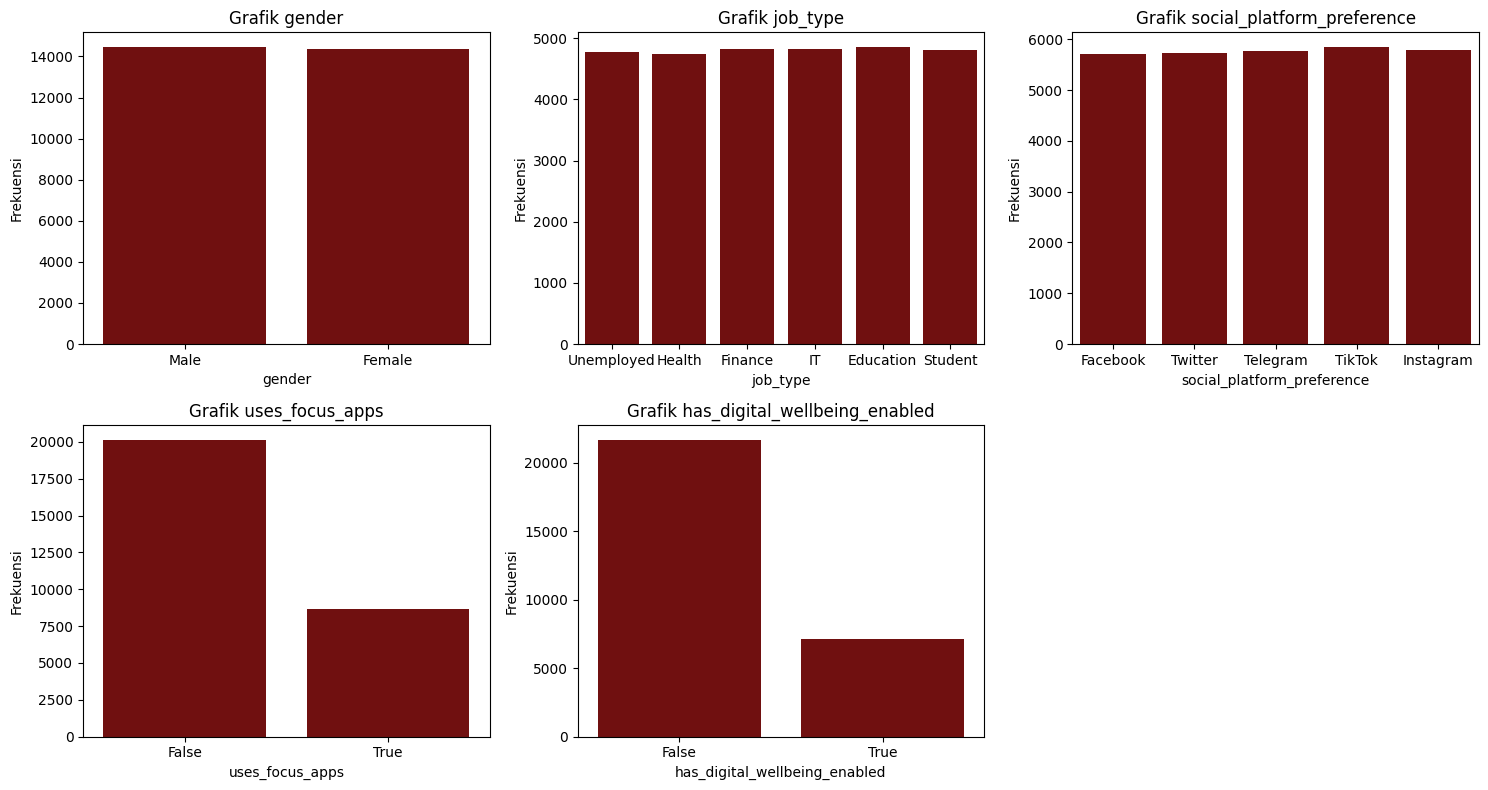

In [48]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(categorical_cols, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, color='maroon' )
    plt.title(f'Grafik {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

In [47]:
df = df[df['gender']!='Other'].reset_index(drop=True)
df.shape

(28822, 19)

Multivariat & Transformasi

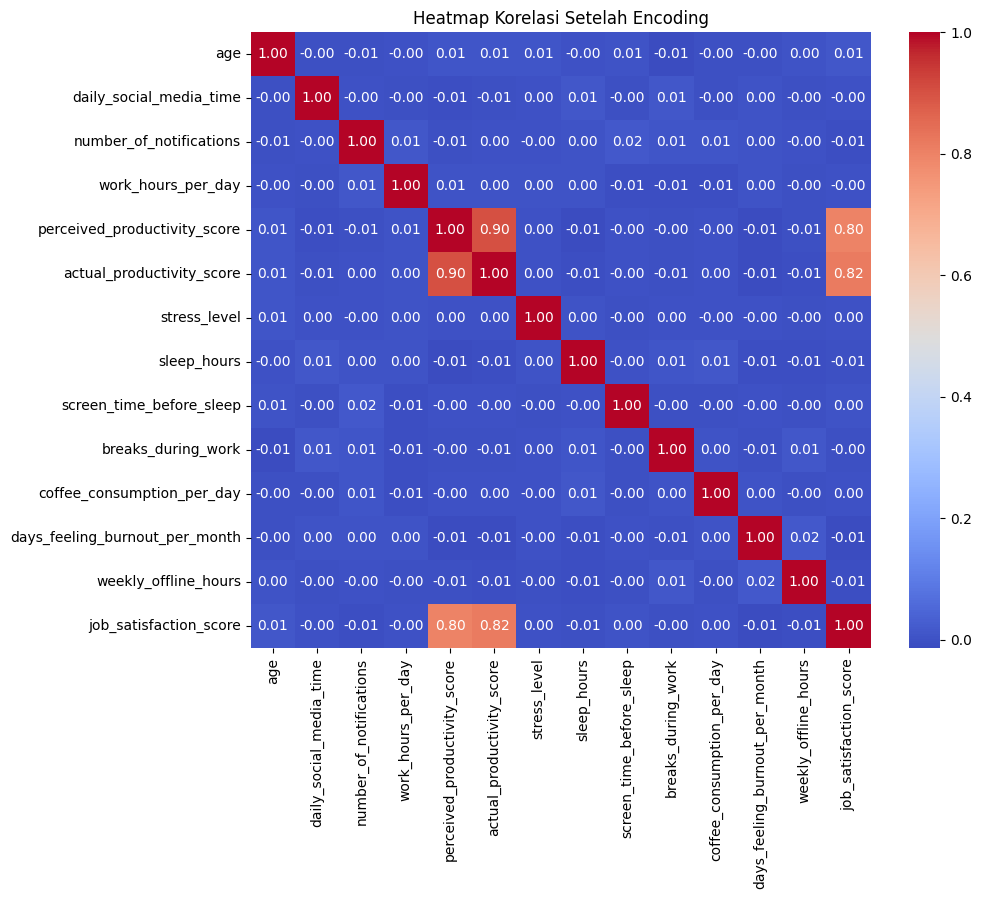

In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in numeric_cols:
    df[col] = StandardScaler().fit_transform(df[[col]])

# Hitung korelasi untuk semua kolom
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Setelah Encoding")
plt.show()

In [58]:
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[[col]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

# **Hierarchical Clustering**

1.  Mendefinisikan kebutuhan untuk hirarki clustering, yang dibutuhkan adalah perhitungan jarak antar poin menggunakan euclidian. Kemudian mencari jarak terpendek dari pasangan poin menggunakan average linkage

In [63]:
class HierarchicalClustering:
  def __init__(self, linkage='average'):
      self.linkage = linkage
      self.cluster = None
      self.merge_history_ = []
      self.jarak_ = []

# menghitung jarak euclidian
  def jarak_euclidian(self, poin1, poin2):
    return np.sqrt(np.sum((poin1 - poin2) ** 2))

# mencari jarak terpendek antara 2 poin
  def average_linkage(self, cluster1, cluster2, data):
    if self.linkage == 'average':
      jarak = []
      for i in cluster1:
        for j in cluster2:
          jarak.append(self.jarak_euclidian(data[i], data[j]))
      return np.mean(jarak)

  def fit(self, X):
    n_sample = len(X)
    cluster = [[i] for i in range(n_sample)] # setiap titik adalah cluster sendiri
    merge_history = [] # simpan histori penggabungan
    jarak = []

    while len(cluster) > 1:
      jarak_terkecil = float('inf')
      merge_indices = (0,1)

      # mencari pasangan cluster dengan jarak terkecil dari average_linkage
      for i in range(len(cluster)):
        for j in range(i+1, len(cluster)):
          jarak_temp = self.average_linkage(cluster[i], cluster[j], X)
          if jarak_temp < jarak_terkecil:
            jarak_terkecil = jarak_temp
            merge_indices = (i, j)

      # menggabungkan cluster yang memliki jarak minimum
      i,j = merge_indices
      cluster_baru = cluster[i] + cluster[j]
      # menyimpan informasi baru
      merge_history.append((cluster[i].copy, cluster[j].copy, jarak_terkecil))
      jarak.append(jarak_terkecil)

      # menghapus cluster lama
      if i < j:
        cluster.pop(j)
        cluster.pop(i)
      else:
        cluster.pop(i)
        cluster.pop(j)
      cluster.append(cluster_baru)

    self.merge_history_ = merge_history
    self.jarak_ = jarak
    self.cluster_akhir = cluster[0]

    return self

  def hasil_cluster(self, n_cluster):
    if n_lcuster <= 0:
      raise ValueError("Jumlah cluster harus positif")

    # Mulai dari cluster akhir dan bagi mundur
    current_clusters = [self.final_cluster_.copy()]

    # Mundur dalam merge history untuk mendapatkan n_clusters
    merge_idx = len(self.merge_history_) - 1

    while len(current_clusters) < n_clusters and merge_idx >= 0:
      # Cari cluster yang perlu dipecah
      cluster1, cluster2, _ = self.merge_history_[merge_idx]
      merged_cluster = cluster1 + cluster2

      # Cari posisi cluster yang perlu dipecah
      for i, cluster in enumerate(current_clusters):
        if set(cluster) == set(merged_cluster):
          # Ganti cluster yang digabung dengan dua cluster asli
          current_clusters.pop(i)
          current_clusters.append(cluster1)
          current_clusters.append(cluster2)
          break

      merge_idx -= 1

    # Buat assignment array
    n_samples = len(self.final_cluster_)
    labels = np.zeros(n_samples, dtype=int)

    for cluster_id, cluster in enumerate(current_clusters):
      for point_idx in cluster:
        labels[point_idx] = cluster_id

    return labels